<a href="https://colab.research.google.com/github/diegoOrd123/Examen-Primer-parcial/blob/main/Primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las librerias necesarias

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [3]:
input_layer_size  = 14
num_labels = 5
data = pd.read_csv('/content/drive/MyDrive/Dataset/Base.csv', delimiter=';')
print(data.shape)

data.info()

(1000000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   income                        1000000 non-null  float64
 1   name_email_similarity         1000000 non-null  float64
 2   prev_address_months_count     1000000 non-null  int64  
 3   current_address_months_count  1000000 non-null  int64  
 4   customer_age                  1000000 non-null  int64  
 5   intended_balcon_amount        1000000 non-null  float64
 6   zip_count_4w                  1000000 non-null  int64  
 7   velocity_6h                   1000000 non-null  float64
 8   velocity_24h                  1000000 non-null  float64
 9   velocity_4w                   1000000 non-null  float64
 10  credit_risk_score             1000000 non-null  int64  
 11  bank_months_count             1000000 non-null  int64  
 12  proposed_credit

In [4]:


def generate_synthetic_data_with_perturbations(num_samples, real_data):
    synthetic_data = {}

    # Definir un rango de perturbaciones
    perturbation_scale = 0.1

    for col in real_data.columns:
        if real_data[col].dtype in [np.float64, np.int64]:
            unique_values = real_data[col].values

            # Generar datos sintéticos
            base_values = np.random.choice(unique_values, size=num_samples)
            perturbations = base_values * np.random.uniform(-perturbation_scale, perturbation_scale, size=num_samples)
            synthetic_data[col] = base_values + perturbations

        elif real_data[col].dtype == object:
            # Para columnas categóricas
            synthetic_data[col] = np.random.choice(real_data[col].unique(), size=num_samples)

    return pd.DataFrame(synthetic_data)



syntheticData = generate_synthetic_data_with_perturbations(1000000, data)

# Concatenar con el DataFrame original
combinedData = pd.concat([data, syntheticData], ignore_index=True)

print(combinedData.shape)

(2000000, 14)


In [5]:
y = combinedData.iloc[:, -1]
print(y)
mapping = {'AB': 0, 'AA': 1, 'AC': 2, 'AE': 3, 'AD': 4}
def convert_column_to_numeric(data, mapping):
    vectorized_map = np.vectorize(mapping.get)
    numeric_data = vectorized_map(data)
    return numeric_data
numeric_data = convert_column_to_numeric(y, mapping)
y = numeric_data
print(y)

0          AA
1          AD
2          AB
3          AB
4          AA
           ..
1999995    AB
1999996    AA
1999997    AE
1999998    AB
1999999    AB
Name: payment_type, Length: 2000000, dtype: object
[1 4 0 ... 3 0 0]


In [6]:
X=combinedData.iloc[:,:-1]
print(X.shape)
def income_group(income):
    if income < 3:
        return 'Low'
    elif 3 <= income < 7:
        return 'Medium'
    else:
        return 'High'
X['income_level'] = X['income'].apply(income_group)
print(X.shape)
print(X)

(2000000, 13)
(2000000, 14)
               income  name_email_similarity  prev_address_months_count  \
0        3.000000e+00           9.865060e+14                  -1.000000   
1        8.000000e+00           6.174260e+15                  -1.000000   
2        8.000000e+00           9.967070e+15                   9.000000   
3        6.000000e+15           4.751000e+15                  11.000000   
4        9.000000e+00           8.423070e+15                  -1.000000   
...               ...                    ...                        ...   
1999995  5.452902e+15           1.525248e+15                  -0.954800   
1999996  8.596324e+00           4.589241e+15                  -1.073583   
1999997  7.168099e+15           3.718091e+15                  -0.956614   
1999998  2.843506e+00           7.728362e+15                  -0.929376   
1999999  7.604578e+00           8.651583e+14                  32.510208   

         current_address_months_count  customer_age  intended_balcon_am

In [7]:
X['has_long_stable_address'] = (
    (X['prev_address_months_count'] >= 52) |
    (X['current_address_months_count'] >= 52)
).astype(int)
print(X.shape)
print(X)

(2000000, 15)
               income  name_email_similarity  prev_address_months_count  \
0        3.000000e+00           9.865060e+14                  -1.000000   
1        8.000000e+00           6.174260e+15                  -1.000000   
2        8.000000e+00           9.967070e+15                   9.000000   
3        6.000000e+15           4.751000e+15                  11.000000   
4        9.000000e+00           8.423070e+15                  -1.000000   
...               ...                    ...                        ...   
1999995  5.452902e+15           1.525248e+15                  -0.954800   
1999996  8.596324e+00           4.589241e+15                  -1.073583   
1999997  7.168099e+15           3.718091e+15                  -0.956614   
1999998  2.843506e+00           7.728362e+15                  -0.929376   
1999999  7.604578e+00           8.651583e+14                  32.510208   

         current_address_months_count  customer_age  intended_balcon_amount  \
0     

In [8]:
def risk_group(credit_risk_score):
    if credit_risk_score <= 83:
        return 'Low'
    elif 83 < credit_risk_score <= 122:
        return 'Medium'
    elif 122 < credit_risk_score <= 178:
        return 'High'
    else:
        return 'Very High'
X['risk_category'] = X['credit_risk_score'].apply(risk_group)
print(X.shape)
print(X)

(2000000, 16)
               income  name_email_similarity  prev_address_months_count  \
0        3.000000e+00           9.865060e+14                  -1.000000   
1        8.000000e+00           6.174260e+15                  -1.000000   
2        8.000000e+00           9.967070e+15                   9.000000   
3        6.000000e+15           4.751000e+15                  11.000000   
4        9.000000e+00           8.423070e+15                  -1.000000   
...               ...                    ...                        ...   
1999995  5.452902e+15           1.525248e+15                  -0.954800   
1999996  8.596324e+00           4.589241e+15                  -1.073583   
1999997  7.168099e+15           3.718091e+15                  -0.956614   
1999998  2.843506e+00           7.728362e+15                  -0.929376   
1999999  7.604578e+00           8.651583e+14                  32.510208   

         current_address_months_count  customer_age  intended_balcon_amount  \
0     

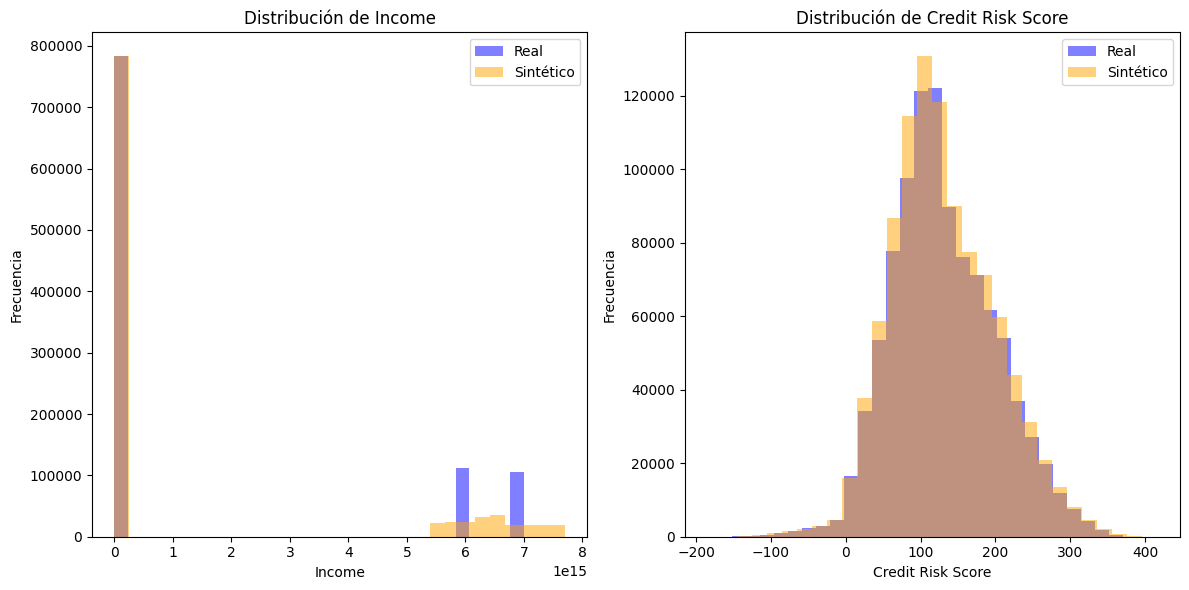

In [9]:
plt.figure(figsize=(12, 6))

# Gráfico para 'income'
plt.subplot(1, 2, 1)
plt.hist(data['income'], bins=30, alpha=0.5, label='Real', color='blue')
plt.hist(syntheticData['income'], bins=30, alpha=0.5, label='Sintético', color='orange')
plt.title('Distribución de Income')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.legend()

# Gráfico para 'credit_risk_score'
plt.subplot(1, 2, 2)
plt.hist(data['credit_risk_score'], bins=30, alpha=0.5, label='Real', color='blue')
plt.hist(syntheticData['credit_risk_score'], bins=30, alpha=0.5, label='Sintético', color='orange')
plt.title('Distribución de Credit Risk Score')
plt.xlabel('Credit Risk Score')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar gráficos
plt.tight_layout()
plt.show()

In [10]:
def convert_labels_to_binary(labels, uniquelabel):
    binary_labels = np.where(labels == uniquelabel, 1, 0)
    return binary_labels

In [11]:
category_mapping = {
    'Low': 1.0,
    'Medium': 2.0,
    'High': 3.0
}

# Función para convertir los strings a valores flotantes usando el diccionario
def map_category(value):
    return category_mapping.get(value, np.nan)

# Aplicar el mapeo solo a la columna de strings (índice 15, que es la columna 16)
X.iloc[:, 13] = X.iloc[:, 13].apply(map_category)
# Convertir toda la matriz a tipo float
#X = X.astype(float)

# Verificar que la conversión fue exitosa
print(X.iloc[:5, :])  # Mostrar las primeras 5 filas

         income  name_email_similarity  prev_address_months_count  \
0  3.000000e+00           9.865060e+14                       -1.0   
1  8.000000e+00           6.174260e+15                       -1.0   
2  8.000000e+00           9.967070e+15                        9.0   
3  6.000000e+15           4.751000e+15                       11.0   
4  9.000000e+00           8.423070e+15                       -1.0   

   current_address_months_count  customer_age  intended_balcon_amount  \
0                          25.0          40.0            1.024540e+16   
1                          89.0          20.0           -8.495510e+15   
2                          14.0          40.0           -1.490390e+16   
3                          14.0          30.0           -1.863100e+16   
4                          29.0          40.0            4.715250e+16   

   zip_count_4w   velocity_6h  velocity_24h   velocity_4w  credit_risk_score  \
0        1059.0  1.309600e+16  7.850960e+15  6.742080e+15         

In [12]:
category_mapping = {
    'Low': 1.0,
    'Medium': 2.0,
    'High': 3.0,
    'Very High': 4.0
}

# Función para convertir los strings a valores flotantes usando el diccionario
def map_category2(value):
    return category_mapping.get(value, np.nan)

# Aplicar el mapeo solo a la columna de strings (índice 15, que es la columna 16)
X.iloc[:, -1] = X.iloc[:, -1].apply(map_category2)
# Convertir toda la matriz a tipo float
#X = X.astype(float)

# Verificar que la conversión fue exitosa
print(X.iloc[:5, :])  # Mostrar las primeras 5 filas

         income  name_email_similarity  prev_address_months_count  \
0  3.000000e+00           9.865060e+14                       -1.0   
1  8.000000e+00           6.174260e+15                       -1.0   
2  8.000000e+00           9.967070e+15                        9.0   
3  6.000000e+15           4.751000e+15                       11.0   
4  9.000000e+00           8.423070e+15                       -1.0   

   current_address_months_count  customer_age  intended_balcon_amount  \
0                          25.0          40.0            1.024540e+16   
1                          89.0          20.0           -8.495510e+15   
2                          14.0          40.0           -1.490390e+16   
3                          14.0          30.0           -1.863100e+16   
4                          29.0          40.0            4.715250e+16   

   zip_count_4w   velocity_6h  velocity_24h   velocity_4w  credit_risk_score  \
0        1059.0  1.309600e+16  7.850960e+15  6.742080e+15         

In [ ]:
X = X.drop(columns=['risk_category'])

In [13]:
def  featureNormalize(X):
    X = np.asarray(X, dtype=np.float64)
    X_norm = X.copy() # Use the input X to create a copy
    mu = np.zeros(X.shape[1]) # Use the input X dimensions
    sigma = np.zeros(X.shape[1]) # Use the input X dimensions

    mu = np.mean(X, axis = 0) # Calculate the mean of the input X
    sigma = np.std(X, axis = 0) # Calculate the standard deviation of the input X
    X_norm = (X - mu) / sigma # Normalize the input X

    return X_norm, mu, sigma

In [25]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X_norm, mu, sigma = featureNormalize(X)
X = X_norm
X_allvsone = X.copy()
X = np.concatenate([np.ones((m, 1)), X], axis=1)

<ipython-input-13-041b7b273f9f>:9: RuntimeWarning: invalid value encountered in divide
  X_norm = (X - mu) / sigma # Normalize the input X


In [15]:
print(X)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

split_index = int(0.8 * X.shape[0])
train_indices = indices[:split_index]
test_indices = indices[split_index:]


X_train = X[train_indices]
X_test = X[test_indices]

Y_train = y[train_indices]
Y_test = y[test_indices]
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set shape:", Y_train.shape)
print("Test set shape:", Y_test.shape)

y_label0 = y.copy()
y_label0 = convert_labels_to_binary(y_label0, 0)
y_label1 = y.copy()
y_label1 = convert_labels_to_binary(y_label1, 1)
y_label2 = y.copy()
y_label2 = convert_labels_to_binary(y_label2, 2)
y_label3 = y.copy()
y_label3 = convert_labels_to_binary(y_label3, 3)


y_label0_train = y_label0[train_indices]
y_label0_test = y_label0[test_indices]
y_label1_train = y_label1[train_indices]
y_label1_test = y_label1[test_indices]
y_label2_train = y_label2[train_indices]
y_label2_test = y_label2[test_indices]
y_label3_train = y_label3[train_indices]
y_label3_test = y_label3[test_indices]

[[ 1.         -0.52403166 -1.17812361 ... -0.41124638 -1.17156583
   0.45059466]
 [ 1.         -0.52403166  0.53286646 ...  0.77937098  0.85355853
   0.45059466]
 [ 1.         -0.52403166  1.78378551 ...  0.77937098 -1.17156583
  -0.44304962]
 ...
 [ 1.          2.14432993 -0.27721077 ...  0.77937098  0.85355853
   1.34423894]
 [ 1.         -0.52403166  1.04542985 ... -1.60186373  0.85355853
  -1.3366939 ]
 [ 1.         -0.52403166 -1.21814569 ...  0.77937098  0.85355853
  -1.3366939 ]]
Training set shape: (1600000, 17)
Test set shape: (400000, 17)
Training set shape: (1600000,)
Test set shape: (400000,)


In [16]:
print(y_label0)
print(y_label1)
print(y_label2)
print(y_label3)

[0 0 1 ... 0 1 1]
[1 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 1 0 0]


In [17]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [18]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    #print(J)
    return J

In [19]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    X = np.array(X)
    X = X.astype(float)
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.80598454 -0.00178649 -0.027008   -0.04122685 -0.01428755  0.05594497
 -0.32925367 -0.01853751 -0.00166773  0.0077321   0.0010811   0.03708422
  0.20257721  0.01941647 -0.01693715  0.01008117  0.02783681]


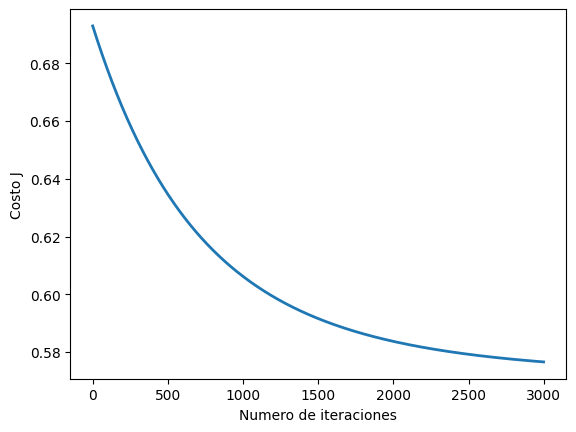

In [20]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta_label0 = np.zeros(17)
theta_label0, J_history = descensoGradiente(theta_0, X_train, y_label0_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_label0)))


#print('Un estudiante con nota del examen 1: 80 y nota del examen 2: 46 (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [21]:
def predict(theta, X_test):
    #devuelve el tamaño del primer eje de la matriz
    m = X_test.shape[0] # Numero de ejemplo de entrenamiento
    #Esta línea inicializa un vector p de tamaño m con ceros
    p = np.zeros(m)
    #Esta línea realiza las predicciones utilizando la función sigmoide y el producto punto entre X_test y theta.T
    p = np.round(sigmoid(X_test.dot(theta.T)))
    return p

In [22]:
p0 = predict(theta_label0, X_test)

print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_label0_test) * 100))

Precisión de entrenamiento: 71.38 %


theta calculado por el descenso por el gradiente: [-1.04229992e+00  3.50106342e-03  1.42734360e-02 -2.28330448e-03
  3.28313568e-02 -2.16605291e-02  5.76364105e-01  8.89947248e-03
 -7.59026973e-04 -3.89113810e-03 -3.31407503e-03 -3.94092301e-02
  1.83270678e-01  1.49549152e-04  3.28079412e-02  1.86473830e-02
 -2.16342706e-02]
Precisión de entrenamiento: 78.29 %


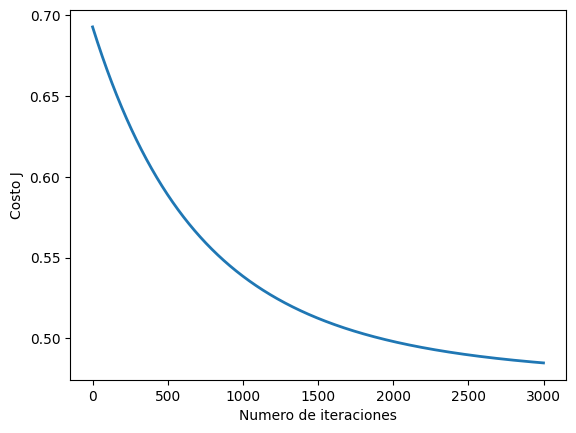

In [23]:
theta_label1 = np.zeros(17)
theta_label1, J_history = descensoGradiente(theta_label1, X_train, y_label1_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_label1)))
p1 = predict(theta_label1, X_test)

print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p1 == y_label1_test) * 100))

theta calculado por el descenso por el gradiente: [-1.05923931e+00  6.84619533e-04  9.73401378e-03  3.91763402e-02
 -3.11024101e-02 -6.71680751e-03 -2.06218924e-01 -1.63812514e-02
  1.73707751e-03 -5.82436124e-03 -3.19621854e-03  4.46946480e-03
 -4.64859466e-01 -3.29746184e-02 -2.84568161e-02  2.05753910e-02
 -6.49209575e-04]
Precisión de entrenamiento: 77.46 %


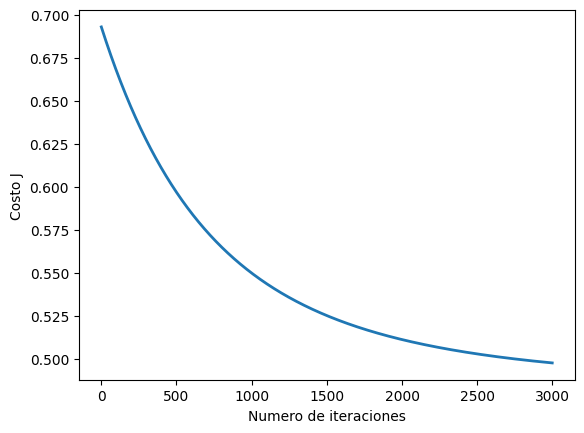

In [24]:
theta_label2 = np.zeros(17)
theta_label2, J_history = descensoGradiente(theta_label2, X_train, y_label2_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_label2)))
p1 = predict(theta_label2, X_test)

print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p1 == y_label2_test) * 100))

In [26]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

In [27]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta